## Import

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io 
from PIL import Image

# This is to fix deprecated alias in numpy, but still used in slgbuilder
np.bool = bool
np.int = int

import sys
sys.path.insert(1, '..')
from functions import *

bPATH = 'data/'

## 8.4.3 Variable number of layers and hidden units

In the exercise above, you have obtained a neural network with a fixed architecture, i.e. the number of neurons and hidden layer. The architecture is however central in modeling with neural networks, and therefore you should make the number of layers and the number of neurons in each of the hidden layers a part of your input choice. You will also need this flexibility in the later exercises for classifying images, for example, the MNIST handwritten digits. 

**1. Implement a neural network**
Keeping the single hidden layer and with a variable number of hidden units.

**2. Extend this by implementing a neural network with a variable number of hidden layers and with a variable number of hidden units in each of these layers**

The number of layers and hidden units are given as input to your function. Now you can play around with your model and from here it is easy to modify it to include other elements like other activation functions or minibatches.

In [138]:
network_size = np.array([2,3,2])

In [139]:
def initialize_weight(input_dim, output_dim):
    input_dim += 1     
    return np.random.normal(0, 1, size=(input_dim, output_dim))*np.sqrt(2/input_dim) # multiply with the factor for stability

In [140]:
def initialize_network(network_size):
    weight_list = []
    for i in range(len(network_size) - 1):
        weight_matrix = initialize_weight(input_dim=network_size[i], output_dim=network_size[i+1])
        weight_list.append(weight_matrix)
    return weight_list

In [141]:
weights_network = initialize_network(network_size)
print(f'The initialized network is given as:\n')
for i, weight in enumerate(weights_network):
    print(f'weight {i} with shape {weight.shape}:\n{weight}\n')

The initialized network is given as:

weight 0 with shape (3, 3):
[[ 0.34552493  0.75619859  0.16209614]
 [ 0.31159834 -0.00431373 -0.18151093]
 [ 0.66742523 -0.28368934  0.16378759]]

weight 1 with shape (4, 2):
[[-3.59541047e-01 -3.37054596e-01]
 [-1.00546199e+00  5.92029960e-01]
 [ 6.34801462e-01  9.43828707e-04]
 [-4.95924397e-01 -1.24587142e+00]]



In [142]:
def ReLU(input):
    return np.maximum(0, input)

print(f'The output for the ReLU is given as: {ReLU(np.array(-1))}')
print(f'The output for the ReLU is given as: {ReLU(np.array(11))}')

The output for the ReLU is given as: 0
The output for the ReLU is given as: 11


In [143]:
# def softmax(input):
#     return np.exp(input)/(np.sum(np.exp(input), axis=0, keepdims=True))
def softmax(input):
    exp_input = np.exp(input - np.max(input, axis=0, keepdims=True))  # Subtract max for numerical stability
    return exp_input / np.sum(exp_input, axis=0, keepdims=True)       # Keep dimensions to avoid broadcasting issues


print(f'The output for the softmax is given as: {softmax(np.array([20, 20])[:, None])}')
print(f'The output for the softmax is given as: {softmax(np.array([10, 20])[:, None])}')
print(f'The output for the softmax is given as: {softmax(np.array([30, 20])[:, None])}')

print()

The output for the softmax is given as: [[0.5]
 [0.5]]
The output for the softmax is given as: [[4.53978687e-05]
 [9.99954602e-01]]
The output for the softmax is given as: [[9.99954602e-01]
 [4.53978687e-05]]



In [144]:
def forward(input, weights_network):
    h_list = []
    for weight in weights_network[:-1]:
        input = np.vstack([input, np.ones(input.shape[1])])
        h = ReLU(weight.T @ input)
        h_list.append(h)
        input = h

    input = np.vstack([input, np.ones(input.shape[1])])
    y = softmax(weights_network[-1].T @ input)
    y = np.clip(y, 1e-15, 1e15)
    return y, h_list

In [145]:
input = np.random.normal(0, 1, size=(2, 10))
y, h_list = forward(input, weights_network)

print(f'y with shape {y.shape}:\n{y}\n')
print(f'h_list with shape {h_list[0].shape} in each list element:\n{h_list}')

y with shape (2, 10):
[[0.67730934 0.51921876 0.72573801 0.67277132 0.6862557  0.63483563
  0.67694669 0.6734914  0.5744461  0.67924157]
 [0.32269066 0.48078124 0.27426199 0.32722868 0.3137443  0.36516437
  0.32305331 0.3265086  0.4255539  0.32075843]]

h_list with shape (3, 10) in each list element:
[array([[0.37858643, 1.22479687, 0.3608633 , 1.29859603, 0.63649975,
        0.8972753 , 0.45235566, 1.15305398, 0.63003402, 0.97634007],
       [0.        , 0.4878735 , 0.        , 0.        , 0.        ,
        0.21819851, 0.        , 0.        , 0.49357757, 0.        ],
       [0.        , 0.21121655, 0.36486545, 0.        , 0.07420841,
        0.2710678 , 0.        , 0.        , 0.55646728, 0.03517503]])]


In [146]:
# def backward(input, target, weights_network, step):
#     Q_list = []
#     y, h_list = forward(input, weights_network)

#     delta = y - target
#     h = np.vstack([h_list[-1], np.ones(h_list[-1].shape[1])])
#     Q = h @ delta.T
#     Q_list.append(Q)

#     weight = weights_network[-1]
#     w_hat = weight[:-1, :]
#     h = h_list[-1]
#     a_prime = h > 0
#     delta = a_prime * (w_hat @ delta) 
#     Q = np.vstack([input, np.ones(input.shape[1])]) @ delta.T
#     Q_list.append(Q)

#     for i, Q in enumerate(reversed(Q_list)):
#         weights_network[i] = weights_network[i] - step*Q

#     return weights_network

# target = np.ones((1,10))
# backward(input, target, weights_network, step=0.1)

def backward(input, target, weights_network, step):
    y, h_list = forward(input, weights_network)

    sum_target_0 = np.sum(y[0, target[0] == 0])
    sum_target_1 = np.sum(y[1, target[0] == 1])
    loss = - (sum_target_0 + sum_target_1) 
    print(loss)
    
    delta = y - target
    h = np.vstack([h_list[-1], np.ones(h_list[-1].shape[1])])
    Q2 = h @ delta.T

    weight = weights_network[-1]
    w2_hat = weight[:-1, :]
    h = h_list[-1]
    a_prime = h > 0
    delta = a_prime * (w2_hat @ delta) 
    Q1 = np.vstack([input, np.ones(input.shape[1])]) @ delta.T
    

    w1, w2 = weights_network[0], weights_network[1]
    weights_network[0] = w1 - step*Q1
    weights_network[1] = w2 - step*Q2
    return weights_network

target = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])
backward(input, target, weights_network, step=0.1)


-3.479745491746707


[array([[ 0.40835744,  0.77212672,  0.17530912],
        [ 0.32046768,  0.02218597, -0.23440552],
        [ 0.67084374, -0.26785817,  0.04825349]]),
 array([[-0.50807789, -0.25798841],
        [-1.00182108,  0.61077931],
        [ 0.62345231,  0.02649994],
        [-0.64794985, -1.09384597]])]

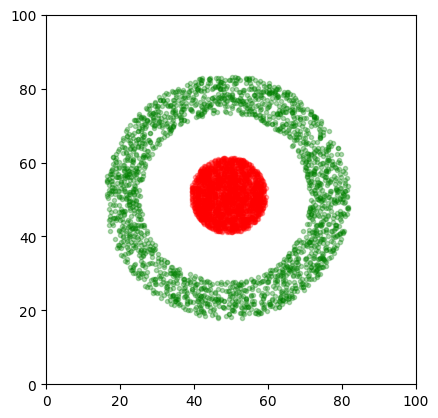

In [147]:
example_nr = 3
n_pts = 2000
noise = 0
X, T, x_grid, dim = make_data(example_nr, n_pts, noise)
indices = np.random.permutation(X.shape[1])
X, T = X[:, indices], T[:, indices]

x_mean = np.mean(X, axis=1)
x_std = np.std(X, axis=1)

x_normalized = (X - x_mean[:, None])/x_std[:, None]
t = np.array(T, dtype=float)

fig, ax = plt.subplots()
ax.plot(X[0,T[0]], X[1,T[0]], '.r', alpha=0.3)
ax.plot(X[0,T[1]], X[1,T[1]], '.g', alpha=0.3)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_box_aspect(1)

In [156]:
network_size = np.array([2,3,2])
weights_network_in = initialize_network(network_size)


batch_size = 4000
epochs = 300
for _ in range(epochs):        
    weights_network = backward(x_normalized, t, weights_network, step=0.000001)
    weights_network_in = weights_network

-2000.0
-2000.0
-2000.0
-1999.9999999999998
-1999.9999999999995
-1999.9999999999998
-2000.0
-2000.0
-2000.0
-2000.0
-1999.999999999999
-2000.0
-2000.0000000000002
-2000.0
-1999.999999999999
-2000.0
-1999.9999999999998
-2000.0
-2000.0
-2000.0
-2000.0000000000002
-2000.0
-2000.0000000000002
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.000000000001
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0000000000007
-1999.9999999999998
-2000.0
-1999.9999999999998
-2000.0
-2000.0
-2000.0
-2000.0
-1999.9999999999998
-2000.0
-1999.9999999999998
-2000.0
-2000.0
-2000.0000000000002
-2000.0000000000002
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0000000000005
-2000.0
-2000.0
-1999.9999999999995
-2000.0000000000002
-2000.0
-2000.0
-2000.0
-2000.000000000001
-2000.0000000000002
-2000.0
-1999.9999999999998
-2000.0
-2000.0
-2000.0
-1999.9999999999998
-2000.0
-2000.0000000000002
-2000.0
-2000.0
-2000.0
-2000.0
-2000.0


[[0.49999998 0.49999998 0.49999998 ... 0.49999998 0.49999998 0.49999998]
 [0.50000002 0.50000002 0.50000002 ... 0.50000002 0.50000002 0.50000002]]
[[False False False ... False False False]
 [ True  True  True ...  True  True  True]]


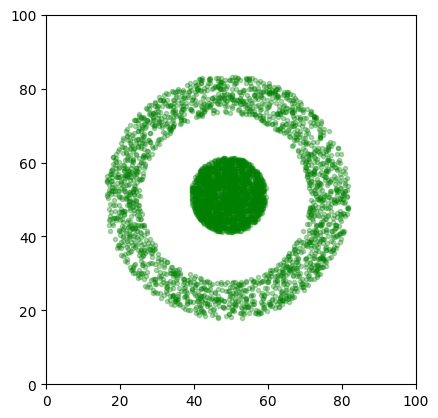

In [157]:
T_esti = forward(X, weights_network)[0]
print(T_esti)
T_esti = np.round(T_esti).astype(bool)
print(T_esti)

fig, ax = plt.subplots()
ax.plot(X[0,T_esti[0]], X[1,T_esti[0]], '.r', alpha=0.3)
ax.plot(X[0,T_esti[1]], X[1,T_esti[1]], '.g', alpha=0.3)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_box_aspect(1)

## QUIZ

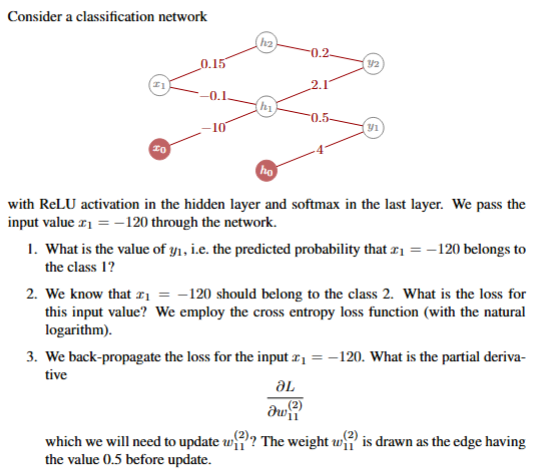

### Question 1

In [13]:
def ReLU(x):
    return np.maximum(0, x)

def softmax(input):
    return np.exp(input)/(np.sum(np.exp(input), axis=0, keepdims=True))

h0 = 1 # bias
x0 = 1 # bias
x1 = -120

h2 = ReLU(x1*0.15)
h1 = ReLU(x1*(-0.1) + (-10)*x0)
print(h1)
y2_hat = h2*0.2 + h1*2.1
y1_hat = h1*0.5 + h0*4

y_hat = np.array([y1_hat, y2_hat])[:, None]
y = softmax(y_hat)

print(f'y is given as:\n{y}')

2.0
y is given as:
[[0.68997448]
 [0.31002552]]


In [21]:
loss =  - np.log(y[1,0])
print(f'The loss for x1 belonging to class y2 is {loss}')

The loss for x1 belonging to class y2 is 1.1711006659477776


In [17]:
t1 = 0
dldw11 = h1 * (y[0,0] - t1)
print(dldw11)

1.3799489622552248
